In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir='E:\\Work\\Machine Learning Course\\Python\\Module 6 Clustering\\Data'

In [3]:
os.chdir(data_dir)

In [4]:
data=pd.read_csv("kc_housingdata.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
## Choose columns that are numeric and have a numeric interpretation
data_num=data[['price','bedrooms','bathrooms','sqft_living']]

In [8]:
data_num.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [9]:
## Scale the data, using pandas
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0)

In [10]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [11]:
## Scale the data using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)

In [12]:
print (dat_scaled)
print ("Type of output is "+str(type(dat_scaled)))
print ("Shape of the object is "+str(dat_scaled.shape))

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ..., 
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is (21613, 4)


In [13]:
## Create a cluster model
import sklearn.cluster as cluster

In [14]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(dat_scaled)

In [15]:
kmeans.labels_

array([0, 2, 0, ..., 0, 2, 0])

In [16]:
kmeans.cluster_centers_

array([[-0.46468042, -0.72681522, -0.86617881, -0.79253015],
       [ 1.88826213,  1.08534638,  1.53828912,  1.91997499],
       [-0.03526871,  0.35465742,  0.36895087,  0.22515342]])

In [17]:
## Elbow method
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / dat_scaled.shape[0])


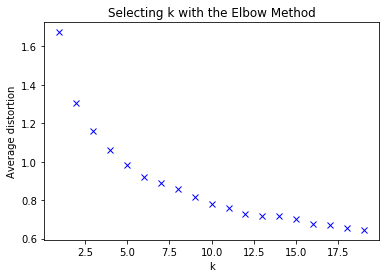

In [18]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [19]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled).labels_

In [20]:
metrics.silhouette_score(dat_scaled,labels,metric="euclidean",sample_size=10000,random_state=200)

0.28313345009707275

In [21]:
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 7 is 0.276371284044
Silhoutte score for k= 8 is 0.290395337633
Silhoutte score for k= 9 is 0.285085362353
Silhoutte score for k= 10 is 0.28060697182
Silhoutte score for k= 11 is 0.275783658814
Silhoutte score for k= 12 is 0.281540105566


In [22]:
## Let's try to find the cluster profiles
import os
os.chdir("E:\\Work\\Machine Learning Course\\Python\\Module 6 Clustering\\Codes")

In [23]:
import cluster_profiles as cluster_profiles

In [24]:
## Let's look for profiles for 8,9,10 clusters
kmeans=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled)

In [25]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.644691,0.344504,0.735787,0.992995,3132
1,-0.541668,-0.280571,-1.053502,-0.788342,4013
2,2.285528,0.922012,1.727444,2.194598,994
3,6.410548,1.250798,2.649467,3.697950,161
4,-0.494520,-1.571551,-1.211377,-1.073651,2445
5,0.278340,2.132508,1.031714,1.020664,1070
6,-0.203515,-0.493676,0.194295,-0.238244,5696
7,-0.263011,0.804906,0.129389,0.040654,4102


In [26]:
cluster_profiles.get_profiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,1.438231,1.095053,1.267963,1.438486,3132
1,0.631799,0.922586,0.616330,0.651884,4013
2,2.553597,1.254396,1.629109,1.969089,994
3,5.357597,1.345113,1.964897,2.632939,161
4,0.663848,0.566387,0.558835,0.525898,2445
5,1.189203,1.588388,1.375735,1.450704,1070
6,0.861660,0.863788,1.070759,0.894796,5696
7,0.821217,1.222085,1.047121,1.017952,4102
